<a href="https://colab.research.google.com/github/Youssef-Alyy/machine-learning-labs/blob/main/Deep_Learning/ANN/artificial_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

##Overview


### How do NNs Work

An Artificial Neural Network (ANN) is a computational model inspired by the structure and function of biological neural networks, such as the human brain. In an ANN, interconnected nodes, or neurons, are organized in layers. The process starts with an input layer, where data is received and each neuron represents a feature of the input. Hidden layers lie between the input and output layers, processing the input through weighted connections and applying activation functions to generate an output. The final output layer produces predictions or classifications. Throughout the network, weights and biases adjust the strength of connections and the output of neurons. Activation functions introduce non-linearity, allowing the network to learn complex patterns. Training an ANN involves adjusting these weights and biases to minimize the error between predicted and actual outputs, typically using backpropagation, where errors are propagated backward through the network. ANN's versatility and ability to learn from data have led to their success in tasks such as image recognition, natural language processing, and time series prediction, making them a vital tool in machine learning and artificial intelligence.

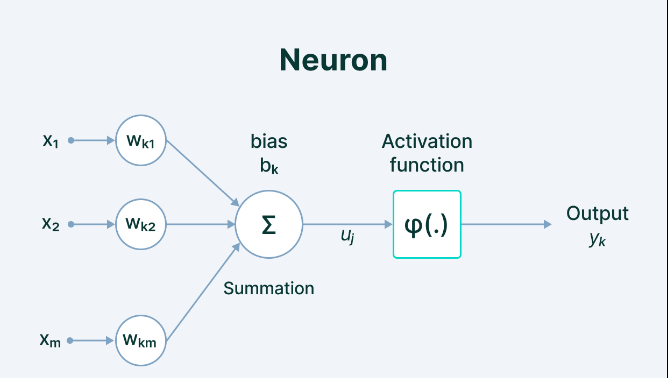

### Activation Functions

Activation functions are mathematical functions applied to the output of each neuron in a neural network. They introduce non-linearity into the network, allowing it to learn complex patterns in data. below are some commonly used activation functions:



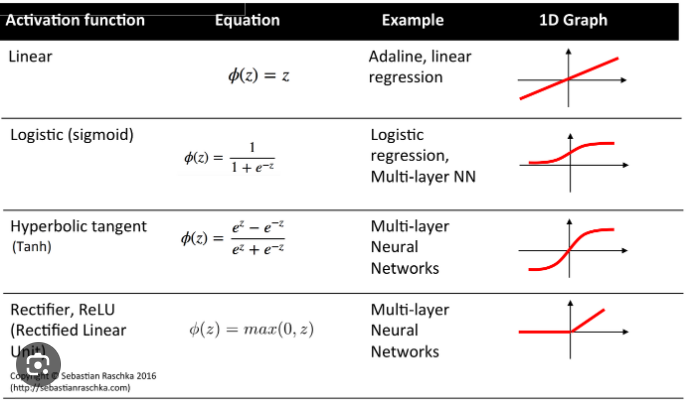

### How do NNs learn

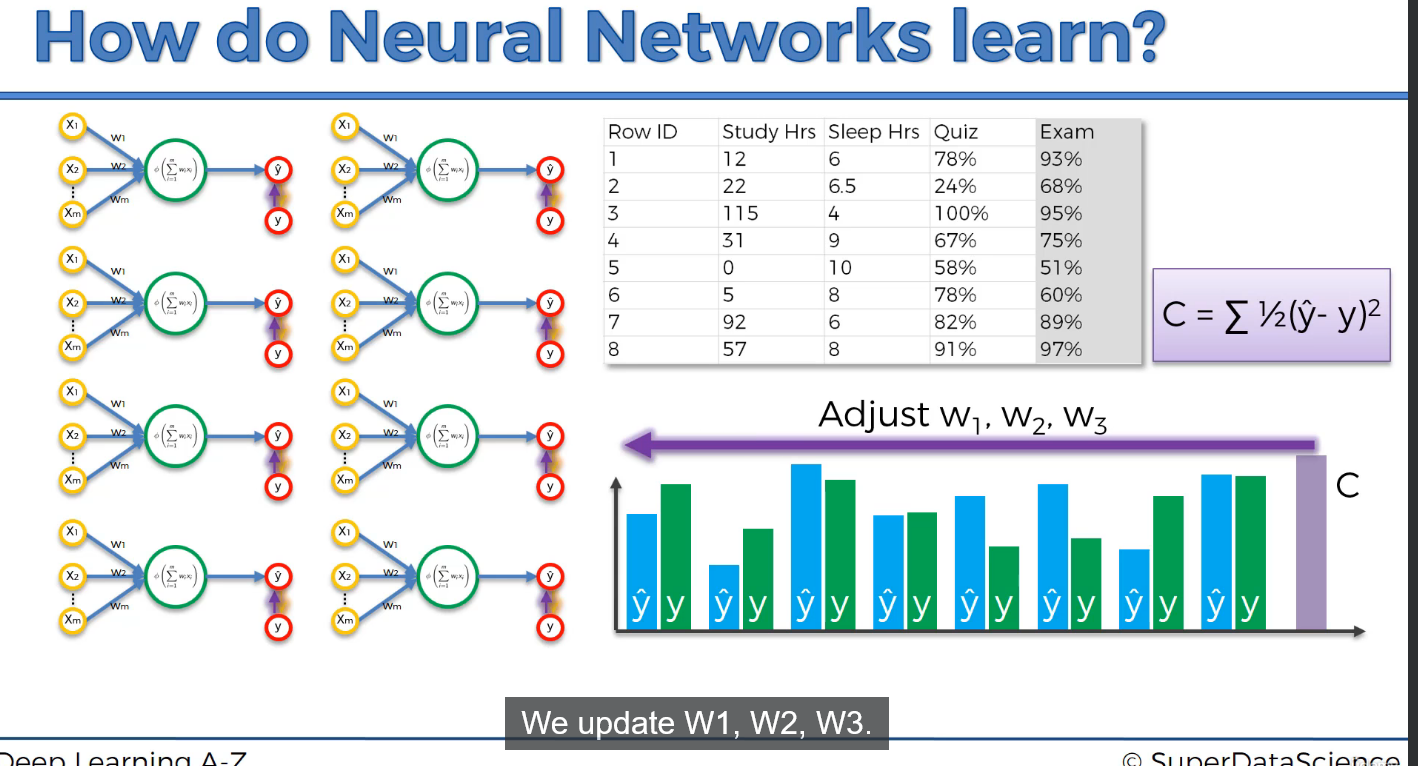

### Batch Gradient vs Stochastic Gradient Descent

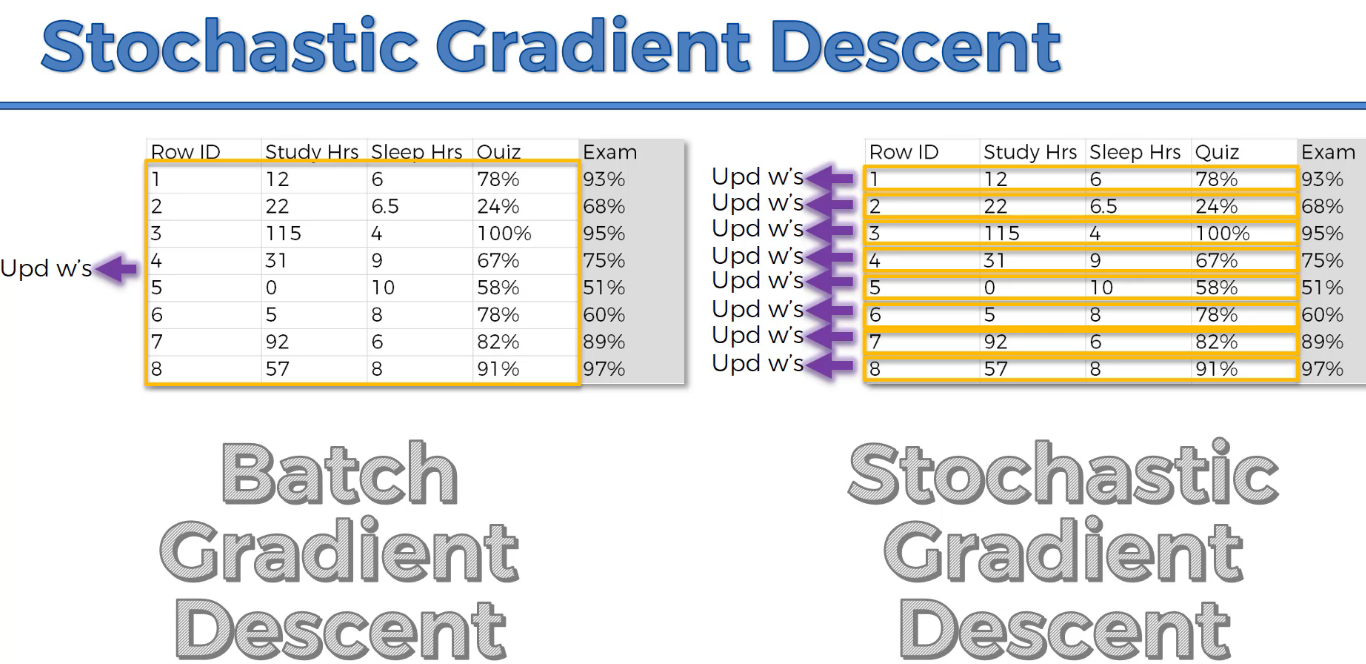

### Training the ANN with Stochastic Gradient Descent

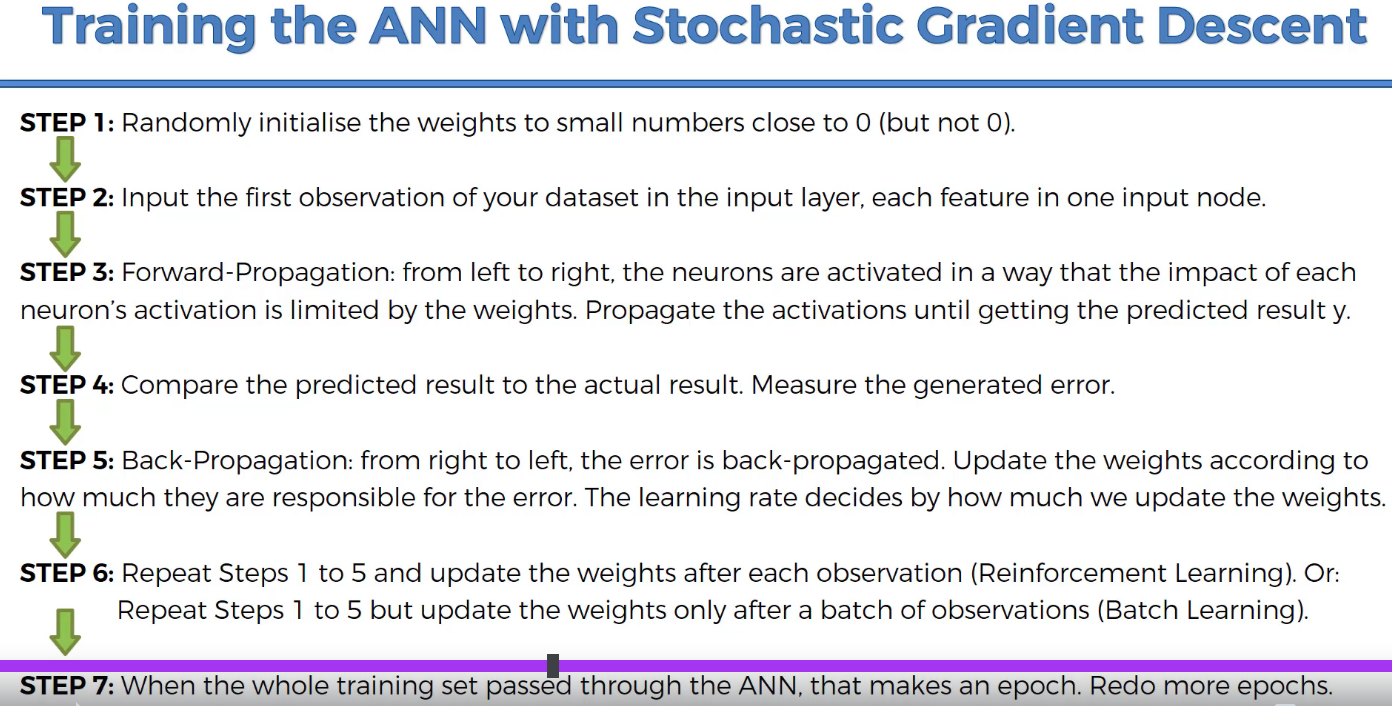

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
tf.__version__

'2.15.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [9]:
ds = pd.read_csv('Churn_Modelling.csv')
X = ds.iloc[:,3:-1].values
y = ds.iloc[:,-1].values

In [13]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [11]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "Gender" column

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,2] = le.fit_transform(X[:,2])

In [15]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [17]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset into the Training set and Test set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

### Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [20]:
ann = tf.keras.models.Sequential() ##From Keras thats now integated into TensorFlow

### Adding the input layer and the first hidden layer

In [21]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu')) ##no rule of thumb, experiment with hyperparams for # of neurons in hidden layer

### Adding the second hidden layer

In [22]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

### Adding the output layer

> 1 unit since dependent var is binary 1 or 0.
> If it was catergorical with 3 classes then we would have 3 units; and activation would be `soft_max`

In [23]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid')) #with sigmoid as output neuron, we will be able to get prediction + probability

## Part 3 - Training the ANN

### Compiling the ANN

> Adam Optimizer for SGD.

> `binary_crossentropy` for binary ; `category_crossentropy`

> accuracy for evaluation of the ann

In [24]:
ann.compile(optimizer='adam', loss = 'binary_crossentropy',metrics = ['accuracy'])

### Training the ANN on the Training set

In [ ]:
ann.fit(X_train,y_train,batch_size = 32 ,epochs = 100)

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank:

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer ?

**Solution**

In [43]:
print(ann.predict(sc.transform([[1,0,0,600,1,40,3,60000,2,1,1,50000]])) > 0.5)


1/1 [==============================] - 0s 26ms/step
[[False]]


Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [48]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 1ms/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 0]]


### Making the Confusion Matrix

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[1522   63]
 [ 222  193]]


0.8575